In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_to_search = 6
# Syntax to extract month found at: 
#https://stackoverflow.com/questions/12019766/how-to-get-month-and-year-from-date-field-in-sqlalchemy

# Build query 
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search)

In [5]:
#  3. Convert the June temperatures to a list. (adding .all() returns the data as a list)
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search).all()

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Temps'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_to_search = 12
# Syntax to extract month found at: 
#https://stackoverflow.com/questions/12019766/how-to-get-month-and-year-from-date-field-in-sqlalchemy

# Build query 
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search)

In [9]:
# 7. Convert the December temperatures to a list.
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Deliverable 3 Query 1

In [12]:
# Determine most active weather station
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [46]:
# Station USC00519281 has the most readings
# Get temp data for months in question from the most active station
month_to_search = 6
results = session.query(Measurement.date,Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search , Measurement.station == 'USC00519281').all()
# Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Temps'])
df.describe()

,June Temps
count,236.000000
mean,73.271186
std,2.989801
min,65.000000
25%,71.000000
50%,73.000000
75%,75.000000
max,82.000000


<AxesSubplot:ylabel='Frequency'>

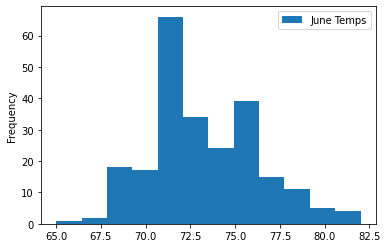

In [47]:
#df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
#print(df.to_string(index=False))

In [48]:
# Station USC00519281 has the most readings
# Get temp data for months in question from the most active station
month_to_search = 12
results = session.query(Measurement.date, Measurement.tobs).\
filter(extract('month',Measurement.date) == month_to_search , Measurement.station == 'USC00519281').all()
# Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','December Temps'])
df.describe()

,December Temps
count,217.000000
mean,69.903226
std,3.803609
min,58.000000
25%,68.000000
50%,70.000000
75%,73.000000
max,79.000000


<AxesSubplot:ylabel='Frequency'>

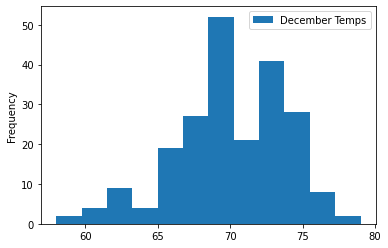

In [49]:
#df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
#print(df.to_string(index=False))

# Deliverable 3 Query 2

<AxesSubplot:ylabel='Frequency'>

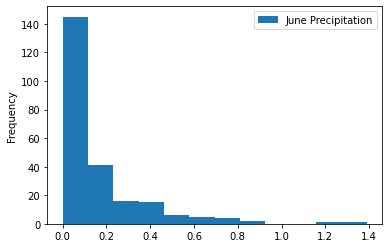

In [54]:
# Using the same weather station - gather rain fall data for June
month_to_search = 6
results = session.query(Measurement.date,Measurement.prcp).\
filter(extract('month',Measurement.date) == month_to_search , Measurement.station == 'USC00519281').all()
# Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','June Precipitation'])
df.plot.hist(bins=12)

<AxesSubplot:ylabel='Frequency'>

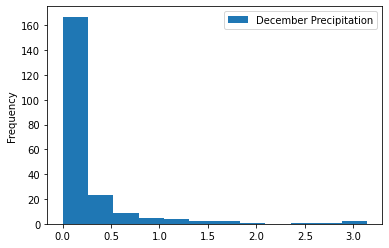

In [56]:
# Using the same weather station - gather rain fall data for December
month_to_search = 12
results = session.query(Measurement.date,Measurement.prcp).\
filter(extract('month',Measurement.date) == month_to_search , Measurement.station == 'USC00519281').all()
# Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','December Precipitation'])
df.plot.hist(bins=12)